# Материалы

**Презентация:** https://disk.yandex.ru/i/rk7OWnp2J0ATsw

**Дашборд:** https://public.tableau.com/views/BankclientsproductsGRFINAL/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Декомпозиция

Заказчик - менеджер регионального банка "Метанпром"


**Цель исследования**

Анализ и сегментация клиентов регионального банка по количеству потребляемых продуктов

**Задачи**

- проведение исследовательского анализа данных,
- сегментация пользователей на основе данных о количестве потребляемых продуктов,
- формулировка и проверка статистических гипотез:

гипотеза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним;

гипотеза о различии score между теми клиентами, которые ушли и теми, которые остались.

**Описание данных**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City — город,
- Gender — пол,
- Age — возраст,
- Objects — количество объектов в собственности,
- Balance — баланс на счёте,
- Products — количество продуктов, которыми пользуется клиент,
- CreditCard — есть ли кредитная карта,
- Loyalty — активный клиент,
- estimated_salary — заработная плата клиента,
- Churn — ушёл или нет.

По результатам исследования необходимо подготовить:

•	презентацию,

•	дашборд 

**Ход исследования**
1.	Обзор и предобработка данных.
- Определить, в каких столбцах есть пропуски.
- Заполнить пропущенные значения там, где это возможно. 
- Привести наименование колонок к единому стилю, оценить влияние пропусков на исследование.
- Найти возможность исправить самое критичное.
- Изучить уникальные значения.
2.	Исследовательский анализ данных
- Исследовать и проанализировать распределение признаков и их влияние на отток клиентов. Построить столбчатые диаграммы и диаграммы размаха для категориальных признаков и гистограммы распределения для числовых признаков.
- Изучить выбросы
- Провести сегментацию клиентов по количеству продуктов. 
- Сделать и описать промежуточные выводы.
3.	Сегментация пользователей

Описать полученные портреты пользователей.

4.	Проверка гипотез

Проверить 2 гипотезы:
- гипотеза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним;
- гипотеза о различии кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.


5.	Выводы и рекомендации

По результатам анализа:
- Выявить признаки, наиболее влияющие на отток 
- Дать рекомендации для улучшения деятельности банка


## Обзор и Предобработка данных

# ***Обзор данных***

In [238]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings; warnings.filterwarnings(action = 'ignore')

from scipy import stats as st
from plotly import graph_objects as go
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [239]:
data = pd.read_csv('/datasets/bank_dataset.csv')

**Изучение датафрейма**

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Изучение столбцов**

In [163]:
#введем функцию для изучения столбцов
def data_unique(data, column):
    display(data[column].unique())
    print('Всего уникальных значений:', len(data[column].unique()))

In [164]:
data_unique(data, 'userid')

array([15677338, 15690047, 15662040, ..., 15627268, 15725091, 15671055])

Всего уникальных значений: 10000


In [165]:
data_unique(data, 'score')

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

Всего уникальных значений: 460


In [166]:
data_unique(data, 'City')

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

Всего уникальных значений: 3


In [167]:
data_unique(data, 'Age')

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

Всего уникальных значений: 70


In [168]:
data_unique(data, 'Gender')

array(['Ж', 'М'], dtype=object)

Всего уникальных значений: 2


In [169]:
data_unique(data, 'Objects')

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

Всего уникальных значений: 11


In [170]:
data_unique(data, 'Balance')

array([      nan,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

Всего уникальных значений: 6382


In [171]:
data_unique(data, 'Products')

array([1, 3, 2, 4])

Всего уникальных значений: 4


In [172]:
data_unique(data, 'CreditCard')

array([1, 0])

Всего уникальных значений: 2


In [173]:
data_unique(data, 'estimated_salary')

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

Всего уникальных значений: 9999


In [174]:
data_unique(data, 'Loyalty')

array([1, 0])

Всего уникальных значений: 2


In [175]:
data_unique(data, 'Products')

array([1, 3, 2, 4])

Всего уникальных значений: 4


In [176]:
data_unique(data, 'Churn')

array([1, 0])

Всего уникальных значений: 2


Неявных дубликатов не обнаружено

Первичная информация о столбцах получена.

# ***Предобработка данных***

In [177]:
#приведем названия заголовков к нижнему регистру
data.columns = data.columns.str.lower()
#изменим названия на более удобные
data = data.rename(columns={'creditcard': 'credit_card', 'userid' : 'user_id'})

data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

**При обзоре датесета было замечено, что есть пропуски в столбце с балансом**

In [178]:
print('Пропусков:', data['balance'].isna().sum())
print('Доля пропусков: ', round(((data['balance'].isna().sum() / len(data['balance']))*100), 2), '%', sep='')

Пропусков: 3617
Доля пропусков: 36.17%


Есть ли связь между балансом и пропусками в других столбцах, закономерность?

In [179]:
data['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

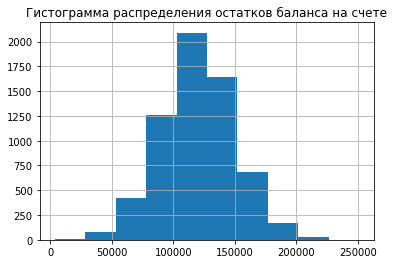

In [180]:
data['balance'].hist()
plt.title("Гистограмма распределения остатков баланса на счете")
plt.show()

Минимальное значение остатка в непропущенных данных равно 3768.69, совсем не представленны балансы близкие к нулю. 

Поскольку мы исследуем отток, изучим то, как как пропуски распределены при группировке по оттоку

In [181]:
data.groupby('churn')['balance'].apply(lambda x: x.isna().sum())

churn
0    3117
1     500
Name: balance, dtype: int64

Пропуски в основном (соотношение 6:1) приходятся на тех, кто остался клиентом.

Возможно пропуски связанны с тем, что клиент пользуется кредитной картой

In [182]:
data.groupby('credit_card')['balance'].apply(lambda x: x.isna().sum())

credit_card
0    1025
1    2592
Name: balance, dtype: int64

In [183]:
data['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

Пропуски в 2,5 раза чаще встречаются для клиентов с кредитной картой

Связь по количеству продуктов?

In [184]:
data.groupby('products')['balance'].apply(lambda x: x.isna().sum())

products
1     905
2    2600
3      98
4      14
Name: balance, dtype: int64

In [185]:
data['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

Большинство пропусков для клиентов, пользующихся 2 продуктами. Тогда, как в целом соотношение пользующихся 1 и 2 продуктами примерно равное. Похоже на некую существенную тенденцию

In [186]:
data.groupby('city')['balance'].apply(lambda x: x.isna().sum())

city
Ростов Великий       0
Рыбинск           1199
Ярославль         2418
Name: balance, dtype: int64

Видно, что у клиентов из Ростова Великого нет ни одного пропуска в столбце с балансом.

Нет других отличий по признакам между клиентами с балансом и без него. Пропуски в данных не должны помешать анализу, поэтому избавляться от них не будем. Без уточняющей информации мы не можем заполнять или удалять эти пропуски

**Изучим внимательнее столбец 'estimated_salary'**

In [187]:
#для удобства изменим тип столбца (уберем копейки)
data['estimated_salary'] = data['estimated_salary'].astype('int')

In [188]:
print('Минимальная зарплата:', data['estimated_salary'].min())
print('Максимальная зарплата:', data['estimated_salary'].max())

Минимальная зарплата: 11
Максимальная зарплата: 199992


In [189]:
data.query('estimated_salary < 16242').describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,8.020000e+02,802.000000,802.000000,802.000000,476.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,1.573077e+07,645.802993,38.610973,4.946384,119569.013718,1.536160,0.679551,0.519950,7917.617207,0.198254
std,7.150570e+04,97.893920,10.462979,2.855814,29123.852244,0.577838,0.466940,0.499914,4675.831801,0.398934
min,1.560895e+07,412.000000,18.000000,0.000000,27517.150000,1.000000,0.000000,0.000000,11.000000,0.000000
25%,1.566943e+07,579.000000,31.000000,2.000000,99550.875000,1.000000,0.000000,0.000000,3776.000000,0.000000
50%,1.572884e+07,646.000000,37.000000,5.000000,119656.110000,1.500000,1.000000,1.000000,8072.500000,0.000000
75%,1.579133e+07,711.000000,43.000000,7.000000,138967.662500,2.000000,1.000000,1.000000,12062.750000,0.000000
max,1.585816e+07,850.000000,77.000000,10.000000,204510.940000,4.000000,1.000000,1.000000,16161.000000,1.000000


In [190]:
data = data[data['estimated_salary'] >= np.percentile(data['estimated_salary'], 2)]

Удалим часть клиентов с зарплатой ниже МРОТ - 16242

In [191]:
print('Обнаружено дубликатов в датасете - {}'
      .format(data.duplicated().sum()),
      '\n',
      'Обнаружено дубликатов в id клиентов - {}'
      .format(data[['user_id']].duplicated().sum()),
      '\n',
      'Обнаружено дубликатов в id и городе клиента - {}'
      .format(data[['user_id', 'city']].duplicated().sum()),
      '\n',
      'Обнаружено дубликатов в id и возрасте клиента - {}'
      .format(data[['user_id', 'age']].duplicated().sum()),
      '\n',
      'Обнаружено дубликатов в id и полу клиента - {}'
      .format(data[['user_id', 'gender']].duplicated().sum()),
      '\n',
      'Обнаружено дубликатов в id и по продуктам клиента - {}'
      .format(data[['user_id', 'products']].duplicated().sum()),
     )
      
      

Обнаружено дубликатов в датасете - 0 
 Обнаружено дубликатов в id клиентов - 0 
 Обнаружено дубликатов в id и городе клиента - 0 
 Обнаружено дубликатов в id и возрасте клиента - 0 
 Обнаружено дубликатов в id и полу клиента - 0 
 Обнаружено дубликатов в id и по продуктам клиента - 0


Явные дубликаты не обнаружены

**Изучим категории клиентов по признакам**

МРОТ составляет 16242 (округлим до 16000), средняя зарплата Рыбинска составляет 48 668 рублей, Ярославля - 49 964 рублей, Ростова Великого - 48 500 рублей(округлим до 50 000). Сформируем категории исходя из этих данных.

In [192]:
#уровень заработной платы
def cat_by_estimated_salary(data):
    
    if data['estimated_salary'] <= 16000:
        return 'Ниже МРОТ'
    
    elif data['estimated_salary'] <= 50000:
        return 'низкий'
    
    elif data['estimated_salary'] <= 100000:
        return 'средний'
    
    else:
        return 'высокий'

data['salary_level'] = data.apply(cat_by_estimated_salary, axis=1)

In [193]:
data['salary_level'].value_counts()

высокий      5010
средний      2537
низкий       1659
Ниже МРОТ     594
Name: salary_level, dtype: int64

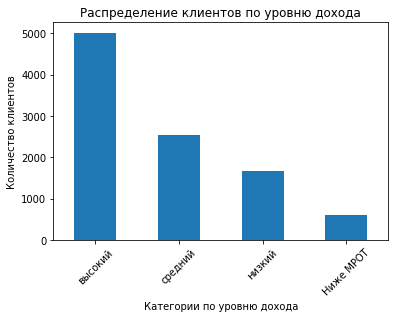

In [194]:
data['salary_level'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Количество клиентов')
plt.xlabel('Категории по уровню дохода')
plt.title('Распределение клиентов по уровню дохода');

По возрасту обозначим следующие категории - кредитные группы:

18-24 - молодежь, в минимальной мере способная погасить кредиты

25-44 - экономически активное население с только образовавшимися семьями и маленькими детьми, с собственными источниками заработка

45-64 - экономически активное население со взрослыми детьми и собственными источниками заработка

65 и старшие - люди пенсионного возраста, которые практически не имеют собственного заработка

In [195]:
#возраст
def cat_by_age(data):
    
    if 18 <= data['age'] <= 24:
        return '18-24'
    
    elif 25 <= data['age'] <= 44:
        return '25-44'
    
    elif 45 <= data['age'] <= 64:
        return '45-64'
    else:
        return '65 и старше'

data['age_category'] = data.apply(cat_by_age, axis=1)

In [196]:
data['age_category'].value_counts()

25-44          7054
45-64          2020
18-24           450
65 и старше     276
Name: age_category, dtype: int64

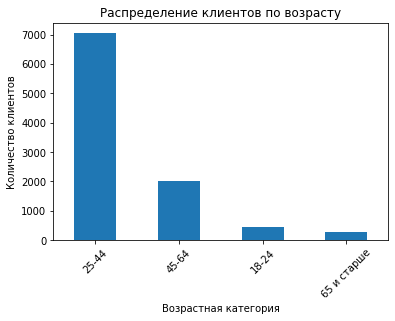

In [197]:
data['age_category'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Количество клиентов')
plt.xlabel('Возрастная категория')
plt.title('Распределение клиентов по возрасту');

В зависимости о баллов скоринга составим такие категории (из сайта Юником24):
    
0 - 449 - плохая оценка, рассчитывать на поучение займа невозможно

450 - 649 - средний результат, существует вероятность требования банком дополнительных документов, подтверждающих платежеспособность

650 - 799 - хороший балл и сумма, который обеспечит высокие шансы на получение займа на стандартных условиях

800 и более - вероятность получения кредита 100%, высокий уровень   

In [198]:
def cat_by_score(data):
    
    if data['score'] < 450:
        return 'плохой'
    
    elif 450 <= data['score'] < 650:
        return 'средний'
    
    elif 650 <= data['score'] < 800:
        return 'хороший'
    
    else:
        return 'отличный'


data['score_level'] = data.apply(cat_by_score, axis=1)

In [199]:
data['score_level'].value_counts()

средний     4630
хороший     4352
отличный     638
плохой       180
Name: score_level, dtype: int64

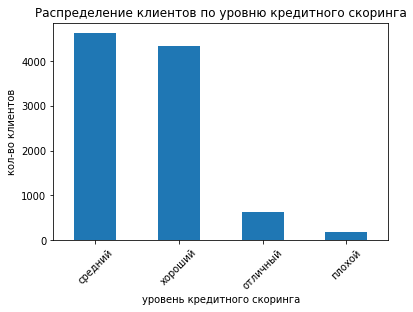

In [200]:
data['score_level'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('кол-во клиентов')
plt.xlabel('уровень кредитного скоринга')
plt.title('Распределение клиентов по уровню кредитного скоринга');

Установим категории по балансу в зависимости от данных:

До 49999 - очень низкий уровень баланса

50000 - 99999 - низкий уровень баланса

100000 - 150000 - средний уровень баланса

150000 и выше - высокий уроень баланса

In [201]:
def cat_by_balance(data):
    
    if data['balance'] < 50000:
        return 'крайне низкий'
    
    elif 50000 <= data['balance'] < 100000:
        return 'низкий'
    
    elif 100000 <= data['balance'] < 150000:
        return 'средний'
    
    elif data['balance'] >= 150000:
        return 'высокий'

data['balance_level'] = data.apply(cat_by_balance, axis=1)

In [202]:
data['balance_level'].value_counts()

средний          3762
низкий           1479
высокий           955
крайне низкий      73
Name: balance_level, dtype: int64

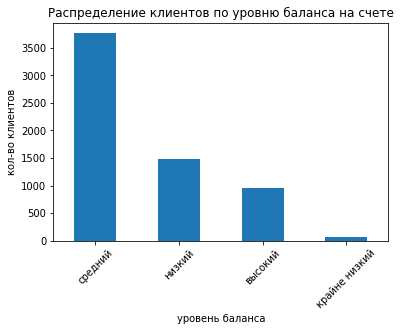

In [203]:
data['balance_level'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('кол-во клиентов')
plt.xlabel('уровень баланса')
plt.title('Распределение клиентов по уровню баланса на счете');

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9800 non-null   int64  
 1   score             9800 non-null   int64  
 2   city              9800 non-null   object 
 3   gender            9800 non-null   object 
 4   age               9800 non-null   int64  
 5   objects           9800 non-null   int64  
 6   balance           6269 non-null   float64
 7   products          9800 non-null   int64  
 8   credit_card       9800 non-null   int64  
 9   loyalty           9800 non-null   int64  
 10  estimated_salary  9800 non-null   int64  
 11  churn             9800 non-null   int64  
 12  salary_level      9800 non-null   object 
 13  age_category      9800 non-null   object 
 14  score_level       9800 non-null   object 
 15  balance_level     6269 non-null   object 
dtypes: float64(1), int64(9), object(6)
memory 

In [205]:
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,salary_level,age_category,score_level,balance_level
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348,1,высокий,25-44,средний,None
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542,0,высокий,25-44,средний,низкий
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931,1,высокий,25-44,средний,высокий
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826,0,средний,25-44,хороший,None
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084,0,средний,25-44,отличный,средний


*ВЫВОД по 1 пункту* 

Изучены пропуски в данных, наличие дубликатов, изменены названия столбцов на удобные.Пропуски имеются только в столбце с балансом у клиентов из Рыбинска и Ярославля, возможно произошла техническая ошибка.Пропуски оставлены, чтобы не исказить данные. В столбце с заработной платой выявлены и удалены некотрые позиции ниже МРОТ.

При изучении данных были созданы категории клиентов по признакам, что помогло выявить следующее:

- По уровню дохода преобладают клиенты с высокой заработной платой (>100000 рублей)

- По возрасту в датасете преобладают клиенты 25-44 лет (что ожидаемо)

- По скорингу преобладают со средним уровнем кредитного скоринга (450-650 баллов)

- По балансу на счете преобладают клиенты со средним уровнем баланса (100000-150000 рублей)


## Исследовательский анализ

Для анализа статистических данных по полу необходимо внести изменения в обозначения

In [206]:
data['gender'] = data['gender'].replace({'Ж':0, 'М': 1})

In [207]:
data.drop(['user_id'], axis=1).describe()

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,9800.000000,9800.000000,9800.000000,9800.000000,6269.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,650.417653,0.545816,38.927959,5.015816,119865.910086,1.529694,0.705612,0.515204,102093.939082,0.204490
std,96.586974,0.497922,10.487520,2.891453,30085.320496,0.583069,0.455790,0.499794,56338.954913,0.403349
min,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,3769.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,100249.410000,1.000000,0.000000,0.000000,54127.250000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,119919.120000,1.000000,1.000000,1.000000,101970.000000,0.000000
75%,717.000000,1.000000,44.000000,7.000000,139532.340000,2.000000,1.000000,1.000000,150103.500000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.000000,1.000000


Таким образом, можно увидеть данные о среднестатистическом клиенте банка
- Скоринговый балл 650 (платежеспособный)

- Возраст 39 лет (клиентам от 18 до 92 лет)

- Мужчина или женщина (мужчин и женщин примерно поровну)

- В собственности 5 объектов

- На счету около 120 000р

- Клиент пользуется 1-2 продуктами

- Вероятнее имеет кредитную карту

- Зарплата - около 102 000р

Замечено, что

- Более чем у половны клиентов есть действующий счет в банке

- Средний отток составляет 20%

**Для визуального изучения распределения признаков используем гистограммы**

In [208]:
#для "разгрузки" кода введем функции для количественных данных
def numeric_plots(df, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))
    
    sns.histplot(df[df['churn']==0][col], color = '#20B2AA', ax = plt.subplot(1, 2, 1))
    sns.histplot(df[df['churn']==1][col], label = 'отток', color = '#F08080', ax = plt.subplot(1, 2, 1), alpha=.4)
    
    plt.ylabel('Количество пользователей')
    plt.legend()
    sns.boxplot(y = col, x = 'churn', data = df, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [209]:
#для "разгрузки" кода введем функции для категориальных данных
def categorical_plots(df, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))

    sns.countplot(x = col, hue = 'churn', data = df, ax = plt.subplot(1, 2, 1),  palette='Set2')
    plt.ylabel('Количество пользователей')
    plt.xlabel('')
    plt.legend() 
    gr = df.groupby([col, 'churn']).agg(count=('age', 'count')).reset_index()
    sns.boxplot(x = col, y = 'count', data = gr, ax = plt.subplot(1, 2, 2), palette='Set3') 
    plt.xlabel('')
    plt.ylabel('')
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [210]:
numeric = pd.DataFrame({'col' : ['score', 'age', 'objects', 'balance', 'products', 'estimated_salary'], 
                        'title' : ['Баллы кредитного скорринга', 'Возраст', 
                                   'Количество объектов недвижимости в собственности', 
                                   'Баланс', 'Количество продуктов банка', 
                                   'Заработная плата клиента']
                       })

categorical = pd.DataFrame({'col' : ['gender', 'city', 'credit_card', 'loyalty'],
                            'title' : ['Пол', 'Город', 'Наличие кредитной карты', 'Активность']
                            })

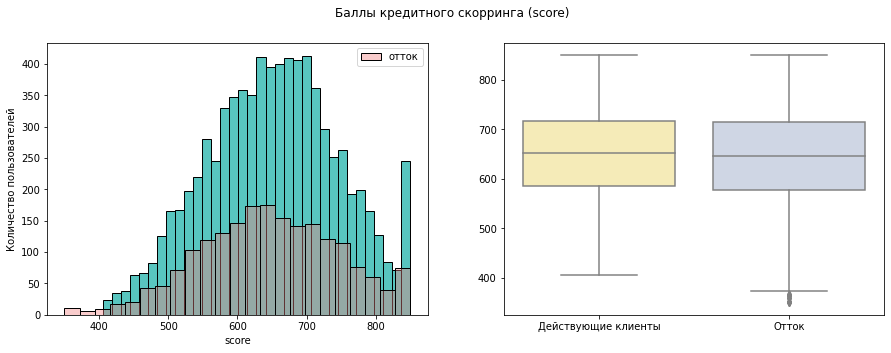

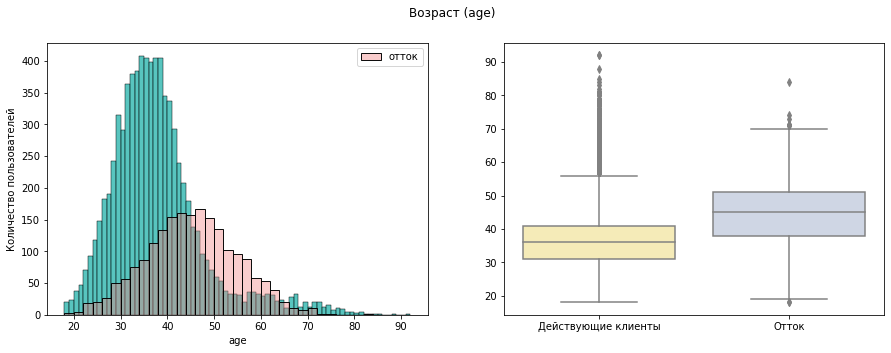

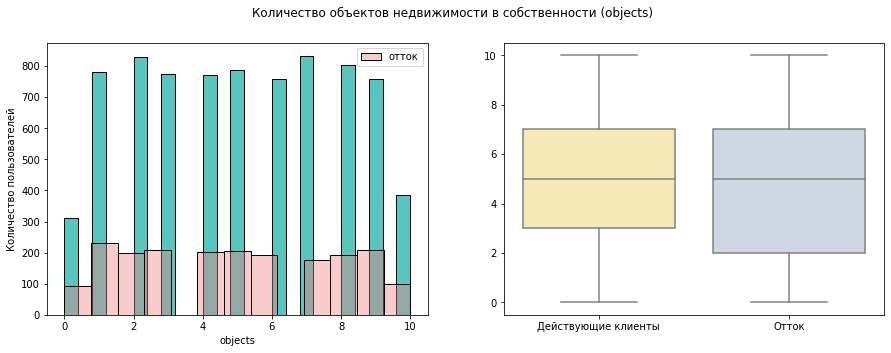

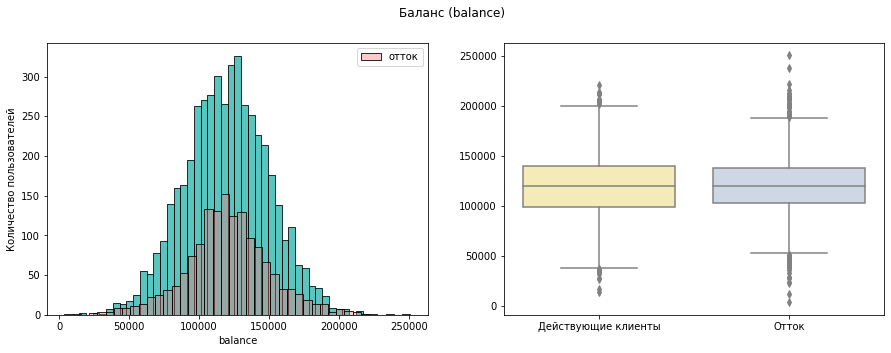

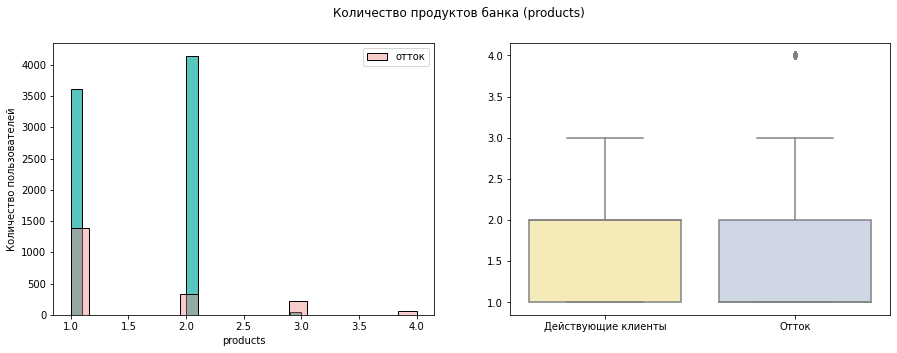

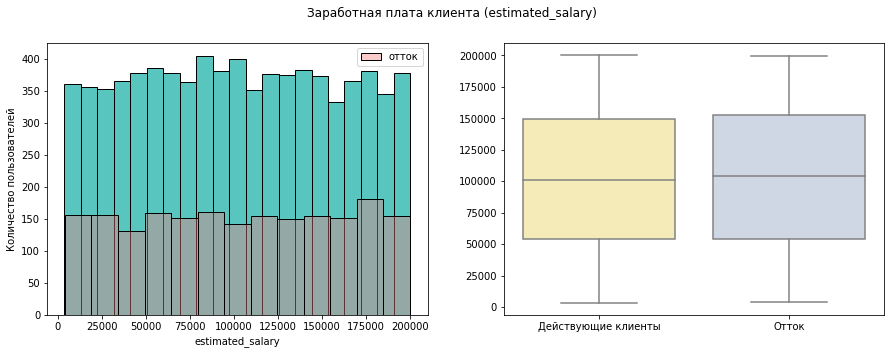

In [211]:
for index, row in numeric.iterrows():
    numeric_plots(data, row[0], row[1])

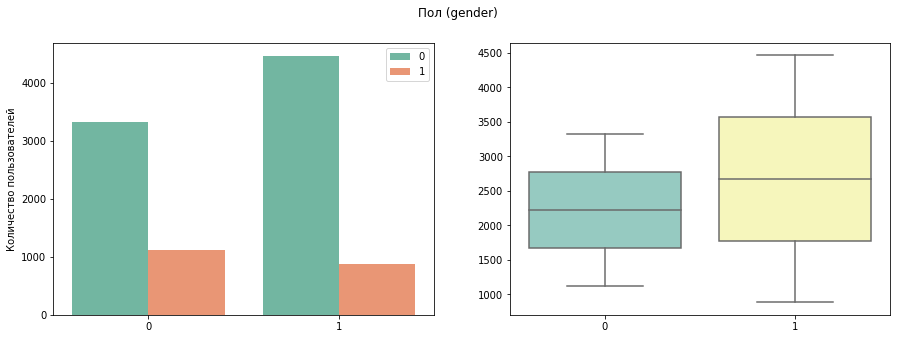

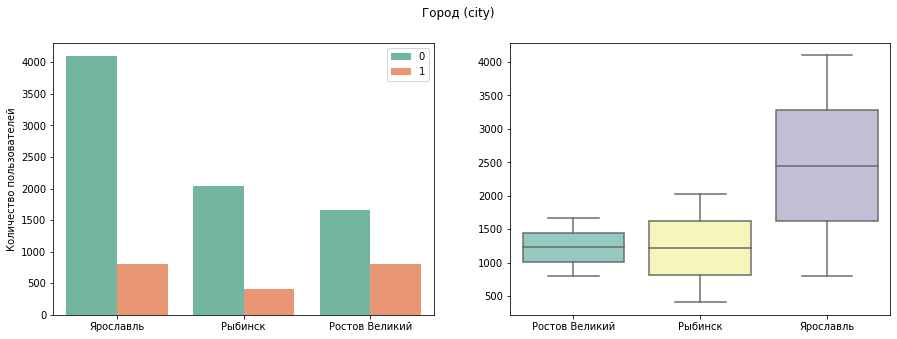

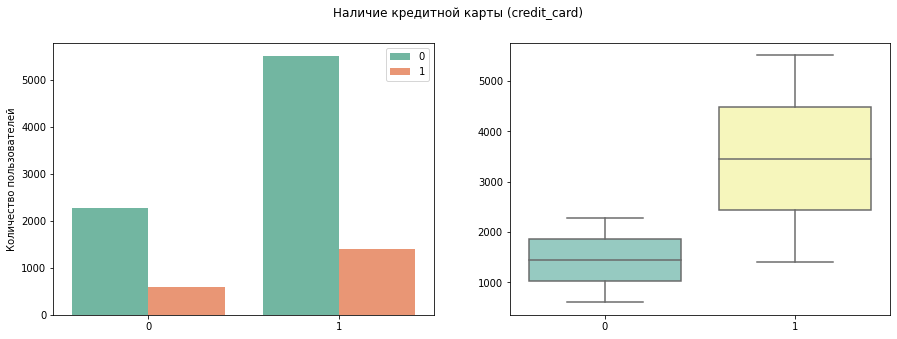

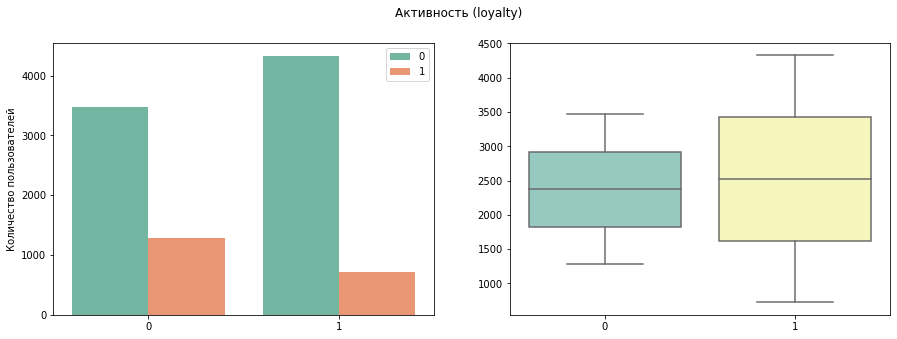

In [212]:
for index, row in categorical.iterrows():
    categorical_plots(data, row[0], row[1])

**Вывод по гистограммам и диаграммам размаха:**

Половина клиентов пользуется услугами банка в Ярославле, остальные пополам распределены по двум другим городам

В основном клиенты пользуются 1-2 продуктами банка 

Минимальное количество клиентов, у которых совсем нет имущества или же 10 объектов в собственности

Распределение баллов скоринга походит нормальное со сдвигом вправо, однако на уровне 850 баллов есть выброс

В основном возраст клиентов 30-50 лет, распределение в большую сторону

Зарплата клиентов распределена почти равномерно

Баланс клиентов на счету имеет нормальное распределения с довольно длтинными хвостами в обе стороны.

**Для выделение наиболее привлекательных групп уберем некоторые аномалии**

In [213]:
np.percentile(data['age'], [95, 97.5, 99])

array([60., 66., 72.])

In [214]:
np.percentile(data['score'], [5, 2.5, 1])

array([489.95, 461.  , 432.  ])

 Уберем пользователей старше 72 лет и скорингом ниже 432 баллов

In [215]:
old_users = pd.concat([data[data['age'] > 72]['user_id']], axis = 0)

In [216]:
low_score_users = pd.concat([data[data['score'] < 432]['user_id']], axis = 0)

In [217]:
abnormalUsers = pd.concat([old_users, low_score_users], axis = 0).drop_duplicates().sort_values()

In [218]:
data = pd.concat([data[np.logical_not(data['user_id'].isin(abnormalUsers))]], axis = 0)

In [219]:
data['user_id'].count()

9623

**Корреляционный анализ**

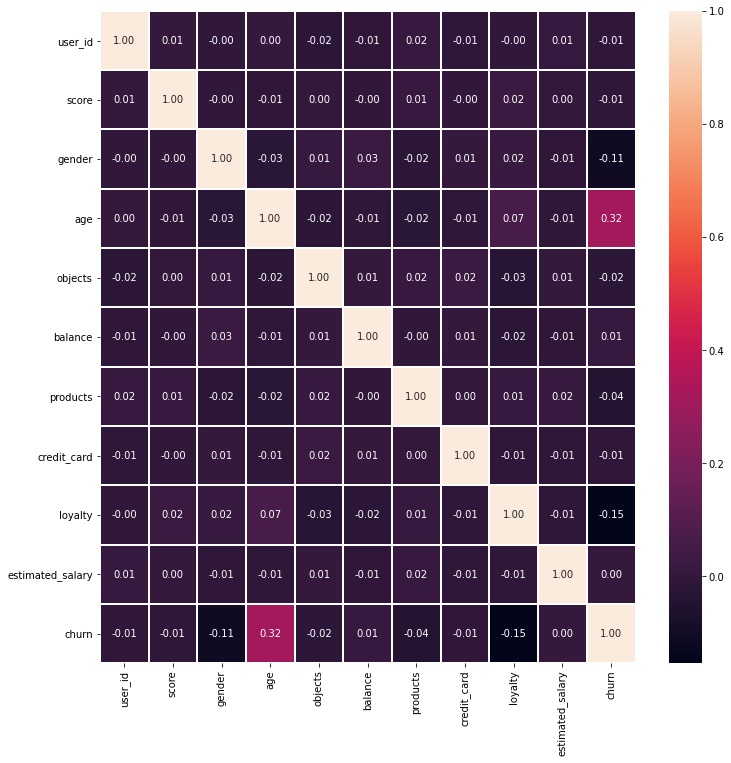

In [220]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr() , annot = True, fmt = '0.2f', linewidths=1)
plt.show();

**Вывод корреляционного анализа:**

Между признаками нет высоких корреляций

Слабая взаимосвязь наблюдается между оттоком и возрастом клиента (0,32)

Обратная слабая связь наблюдается между оотоком и лояльностью(активностью) клиента (-0,15)

Однако очевидного признака, объясняющего склонность клиента к уходу из банка нет

## Сегментация клиентов по потреблению

Сегментация по продуктам

In [221]:
data['products'].value_counts()

1    4896
2    4408
3     260
4      59
Name: products, dtype: int64

In [222]:
data.drop(['user_id'], axis=1).groupby(by='products').mean()

,score,gender,age,objects,balance,credit_card,loyalty,estimated_salary,churn
products,,,,,,,,,
1,651.299837,0.547590,39.284109,4.968546,119983.619090,0.703431,0.500613,101283.005106,0.276961
2,654.300590,0.552632,37.455989,5.065563,119683.127470,0.706670,0.530626,102951.137024,0.075771
3,651.353846,0.438462,43.146154,4.946154,119054.512805,0.711538,0.426923,104436.046154,0.826923
4,658.288136,0.372881,45.966102,5.322034,122420.919111,0.677966,0.491525,104516.016949,1.000000


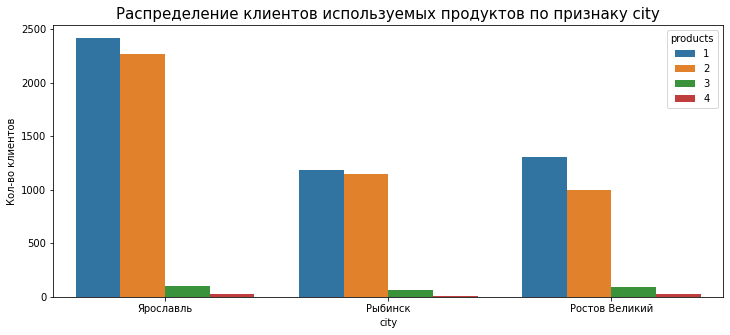

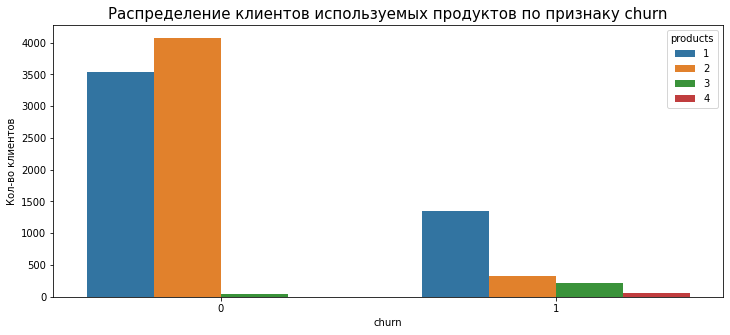

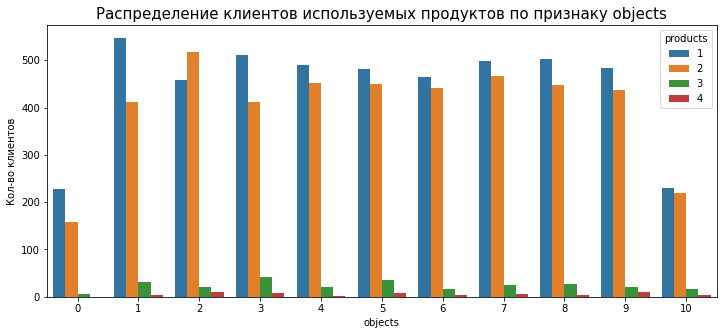

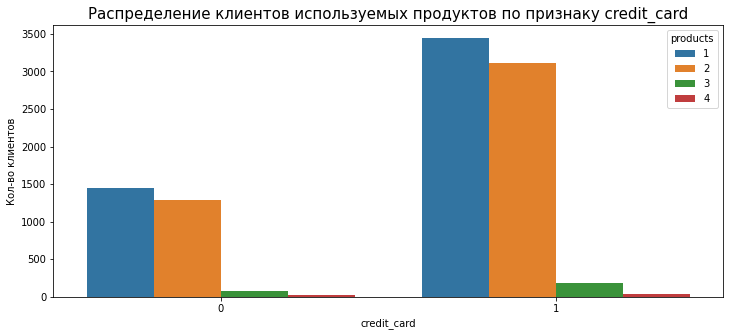

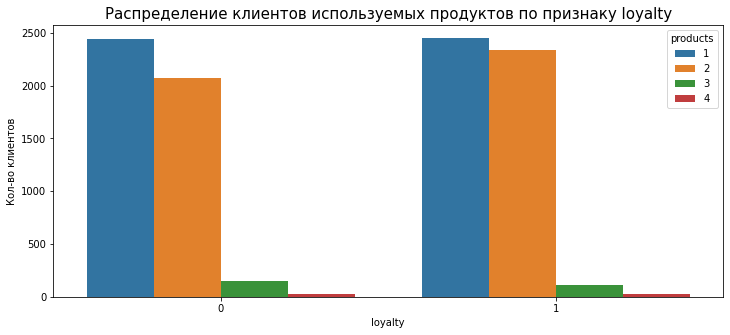

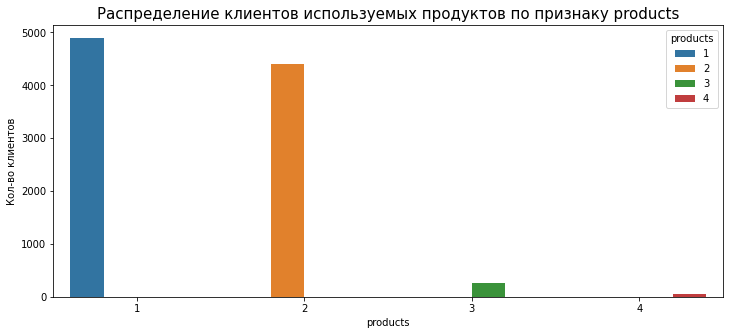

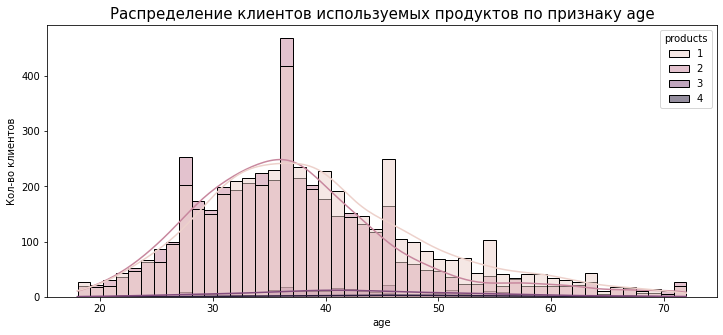

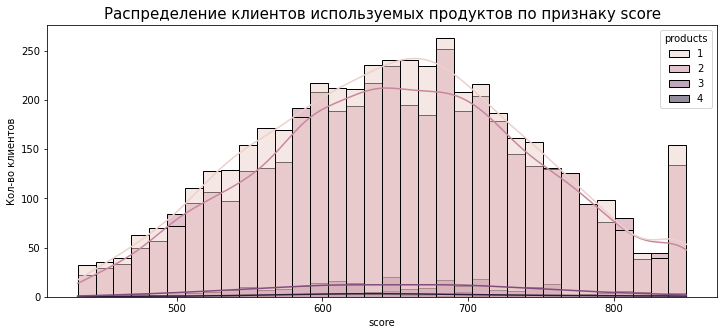

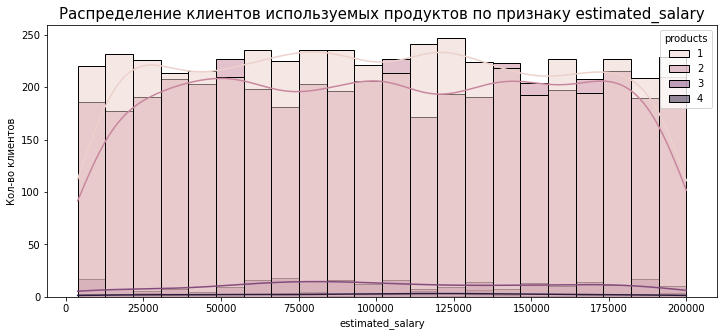

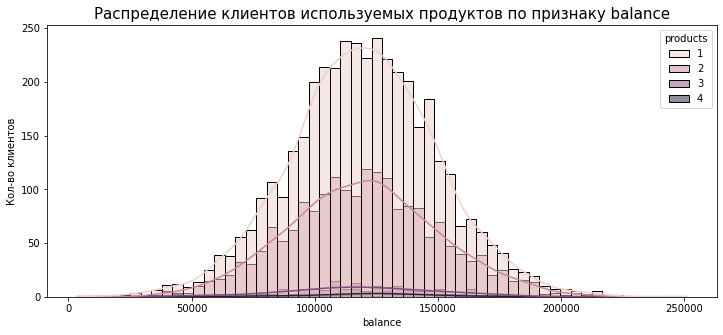

In [223]:
  # с помощью гистограммы изучим распределение продуктов по категориальным и количественным признакам
for col in ['city', 'churn', 'objects', 'credit_card', 'loyalty', 'products']:
        plt.figure(figsize=(12,5))
        ax = sns.countplot(data=data, x=col, hue='products')
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов используемых продуктов по признаку {col}', size=15)
        plt.show()
        
for col in ['age', 'score', 'estimated_salary', 'balance']:
        plt.figure(figsize=(12,5))
        ax = sns.histplot(data=data, x=col, hue='products', kde=True)
        plt.ylabel('Кол-во клиентов')
        plt.title(f'Распределение клиентов используемых продуктов по признаку {col}', size=15)
        plt.show()
 

По показателям пола, количества объектов в собственности, активности, наличия кредитной карты исследуемые группы практически не различаются

Показатель оттока существенно ниже в группе с 2 и более продуктами

Показатели по количественным группам распределены относительно равномерно.

**Анализ клиентов по оттоку**

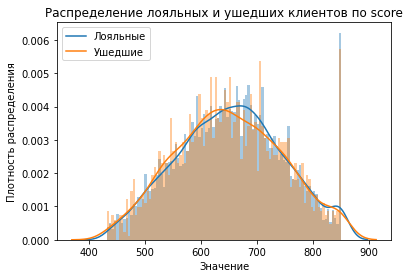

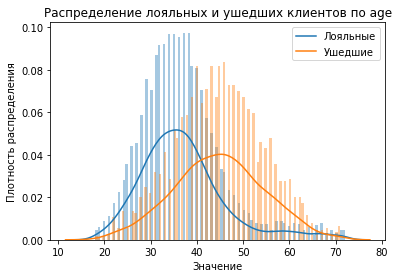

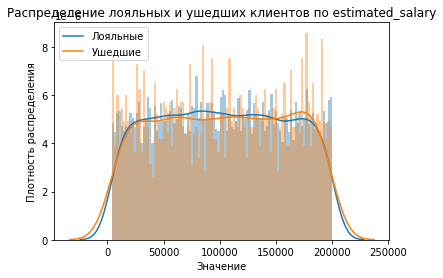

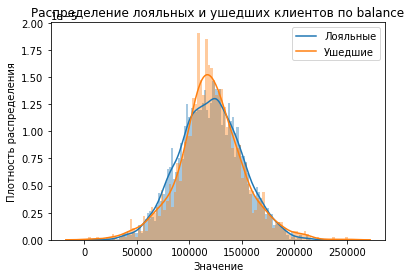

In [224]:
for column in data[['score', 'age', 'estimated_salary', 'balance']].columns:
    sns.distplot(data.query('churn == 0')[column], bins = 100)
    sns.distplot(data.query('churn == 1')[column], bins = 100)
    plt.title('Распределение лояльных и ушедших клиентов по ' + column)
    plt.ylabel('Плотность распределения')
    plt.xlabel('Значение')
    plt.legend(['Лояльные', 'Ушедшие'])
    plt.show();

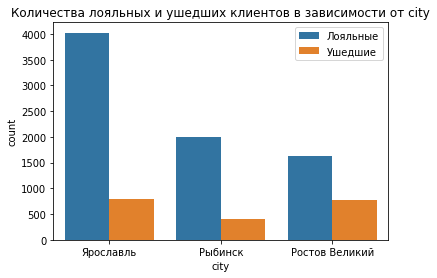

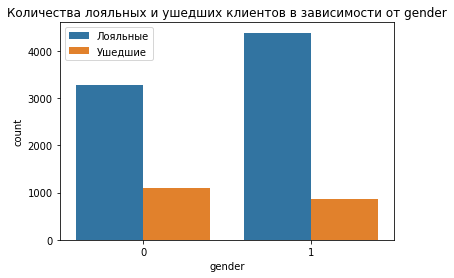

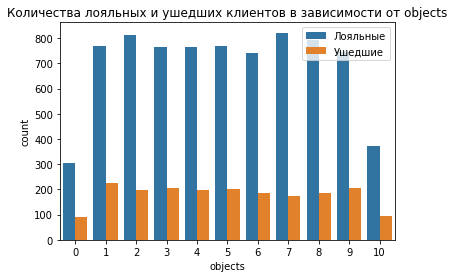

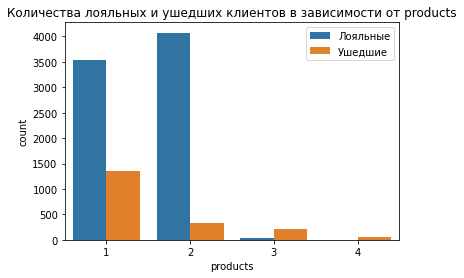

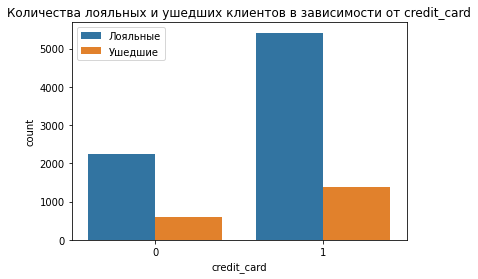

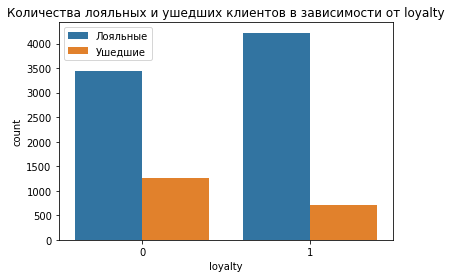

In [225]:
for column in data[['city', 'gender', 'objects', 'products', 'credit_card', 'loyalty']].columns:
    ax = sns.countplot(x = column, hue = 'churn', data = data)
    plt.title('Количества лояльных и ушедших клиентов в зависимости от ' + column)
    plt.legend(['Лояльные', 'Ушедшие'])
    plt.show();

В разрезе городов очевидным лидером по доле отточных клиентов является Ростов Великий, доля ушедших клиентов в Рыбинске и Ярославле почти равна(в 2 раза ниже).

Заметно превышение доли ушедших среди клиентов, пользующихся 3-4 продуктами банка, нежели среди клиентов, пользующихся 1-2 продуктами.


**Для выделения сегментов построим тепловые карты**

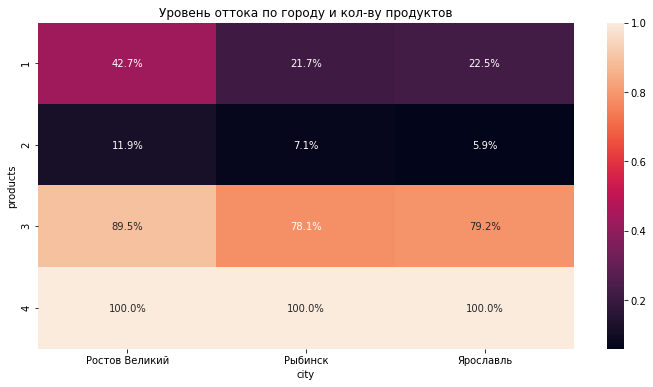

In [226]:
churn_by_city_products = data.pivot_table(
        index='products',
        columns='city',
        values='churn',
        aggfunc='mean'
    )
plt.figure(figsize=(12, 6))
sns.heatmap(churn_by_city_products, annot=True, fmt='.1%')
plt.title('Уровень оттока по городу и кол-ву продуктов')
plt.show();

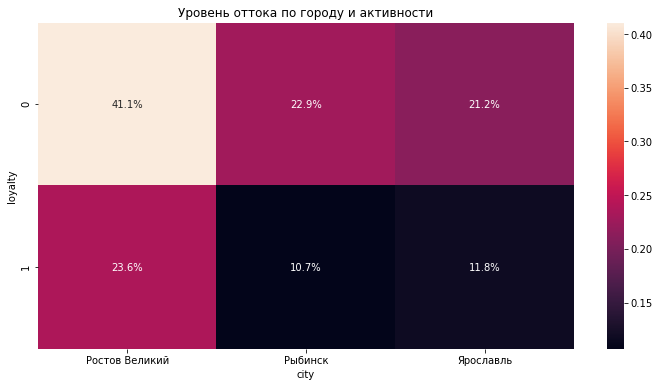

In [227]:
churn_by_city_loyalty = data.pivot_table(
        index='loyalty',
        columns='city',
        values='churn',
        aggfunc='mean'
    )
plt.figure(figsize=(12, 6))
sns.heatmap(churn_by_city_loyalty, annot=True, fmt='.1%')
plt.title('Уровень оттока по городу и активности')
plt.show();

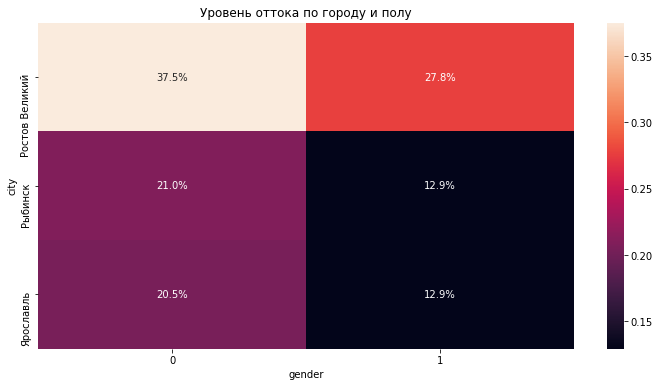

In [228]:
churn_by_city_gender = data.pivot_table(
        index='city',
        columns='gender',
        values='churn',
        aggfunc='mean'
    )
plt.figure(figsize=(12, 6))
sns.heatmap(churn_by_city_gender, annot=True, fmt='.1%')
plt.title('Уровень оттока по городу и полу')
plt.show();

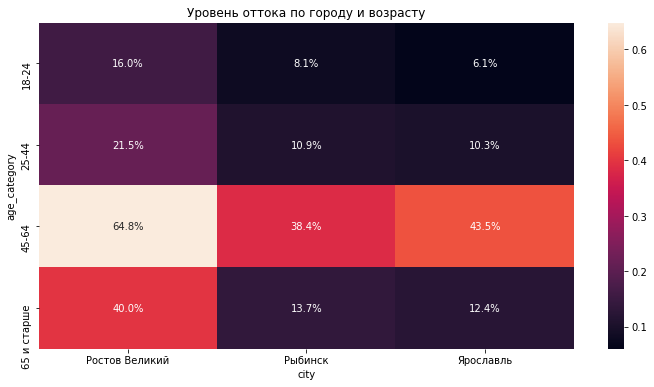

In [229]:
churn_by_city_age = data.pivot_table(
        index='age_category',
        columns='city',
        values='churn',
        aggfunc='mean'
    )
plt.figure(figsize=(12, 6))
sns.heatmap(churn_by_city_age, annot=True, fmt='.1%')
plt.title('Уровень оттока по городу и возрасту')
plt.show();

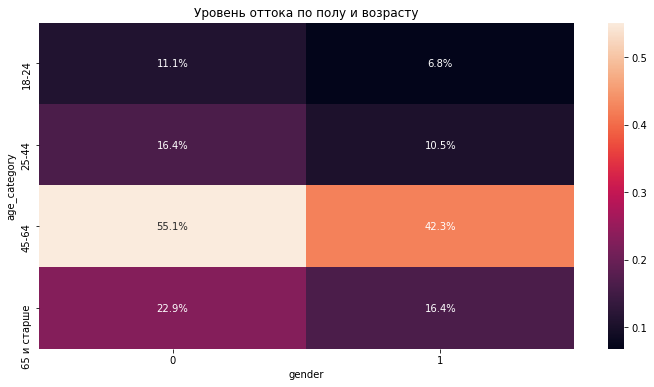

In [230]:
churn_by_gender_age = data.pivot_table(
        index='age_category',
        columns='gender',
        values='churn',
        aggfunc='mean'
    )
plt.figure(figsize=(12, 6))
sns.heatmap(churn_by_gender_age, annot=True, fmt='.1%')
plt.title('Уровень оттока по полу и возрасту')
plt.show();

Полученные "отточные" сегменты:

- Все клиенты, пользующиеся 3 или 4 продуктами банка

- Клиенты из Ростова Великого, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64

- Клиенты из Ростова Великого, мужчины, неактивные пользователи с 1-2 продуктами, возраст 45-64

- Клиенты из Ярославля, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64

- Клиенты из Рыбинска, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64
- Клиенты из Ростова Великого, женщины, неактивные пользователи с 1-2 продуктами, возраст 65 и старше.

In [231]:
churn_segments = [
    ("Все клиенты с 3-4 продуктами", 'products > 2'),
    ("Клиенты из Ростова Великого, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64", 'city == "Ростов Великий" & gender == 0 & age_category == "45-64" & loyalty == 0 & products <= 2'),
    ("Клиенты из Ростова Великого, мужчины, неактивные пользователи с 1-2 продуктами, возраст 45-64", 'city == "Ростов Великий" & gender == 1 & age_category == "45-64" & loyalty == 0 & products <= 2'),
    ("Клиенты из Ярославля, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64", 'city == "Ярославль" & gender == 0 & age_category == "45-64" & loyalty == 0 & products <= 2'),
    ("Клиенты из Рыбинска, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64", 'city == "Рыбинск" & gender == 0 & age_category == "45-64" & loyalty == 0 & products <= 2'),
    ("ростовчане женщины страше 65 неактивные 1-2 продукта",'city == "Ростов Великий" & gender == 0 & age_category == "65 и старше" & loyalty == 0 & products <= 2')
]
seg = []
for text, query in churn_segments:
    result = data.query(query)\
              .agg({"churn":['count','mean']}).round(2).T
    result.index = [text]
    seg.append(result)
segments_data = pd.concat(seg)
segments_data.sort_values(by = 'mean', ascending=False)

,count,mean
ростовчане женщины страше 65 неактивные 1-2 продукта,4.0,1.00
Все клиенты с 3-4 продуктами,319.0,0.86
"Клиенты из Ростова Великого, мужчины, неактивные пользователи с 1-2 продуктами, возраст 45-64",130.0,0.78
"Клиенты из Ростова Великого, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64",161.0,0.77
"Клиенты из Ярославля, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64",181.0,0.67
"Клиенты из Рыбинска, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64",99.0,0.62


*ВЫВОД по пункту 3*

По показателям пола, количества объектов в собственности, активности, наличия кредитной карты исследуемые группы практически не различаются.

Показатель оттока существенно ниже в группе с 2 и более продуктами.

Показатели по количественным группам распределены относительно равномерно.

В разрезе городов очевидным лидером по доле отточных клиентов является Ростов Великий, доля ушедших клиентов в Рыбинске и Ярославле почти равна(в 2 раза ниже).

Заметно превышение доли ушедших среди клиентов, пользующихся 3-4 продуктами банка, нежели среди клиентов, пользующихся 1-2 продуктами.

Выделены сегменты по оттоку:

- Все клиенты, пользующиеся 3 или 4 продуктами банка

- Клиенты из Ростова Великого, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64

- Клиенты из Ростова Великого, мужчины, неактивные пользователи с 1-2 продуктами, возраст 45-64

- Клиенты из Ярославля, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64

- Клиенты из Рыбинска, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64
- Клиенты из Ростова Великого, женщины, неактивные пользователи с 1-2 продуктами, возраст 65 и старше.

## Проверка гипотез

**1 Гипотеза**

- Н0: Средние доходы между клиентами, которые пользуются двумя продуктами банка, и теми, кто пользуется одним, одинаковы.  
- Н1: Средние доходы между клиентами, которые пользуются двумя продуктами банка, и теми, кто пользуется одним, различаются.

Проверим распределение даннных

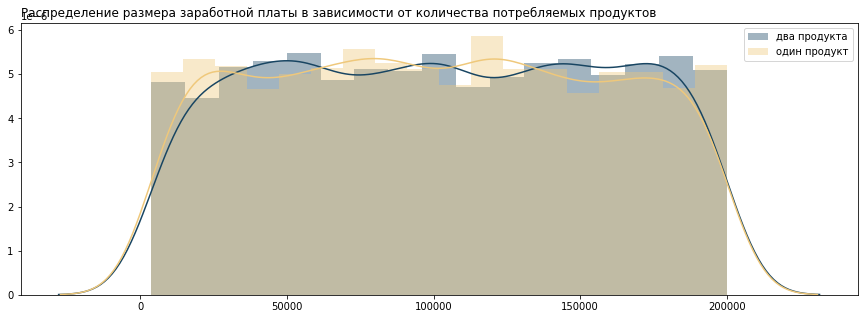

In [232]:
plt.figure(figsize=(15, 5))

sns.distplot(data[data['products'] == 2]['estimated_salary'], color = '#184562', label = 'два продукта')
sns.distplot(data[data['products'] < 2]['estimated_salary'], color = '#EFC87B', label = 'один продукт')

plt.title('Распределение размера заработной платы в зависимости от количества потребляемых продуктов', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Данные по зарплате распределены равномерно

In [233]:
alpha = .05   
results = st.stats.ttest_ind(data[data['products'] == 2]['estimated_salary'], 
                             data[data['products'] < 2]['estimated_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.15417847267394227
Не получилось отвергнуть нулевую гипотезу


Следовательно, доходы между клиентами, которые пользуются двумя продуктами банка, и теми, кто пользуется одним, одинаковы

**2 Гипотеза**

- Н0: Средние баллы кредитного скоринга у клиентов, которые попали в отток, и у действующих клиентов одинаковы.  
- Н1: Средние баллы кредитного скоринга у клиентов, которые попали в отток, и у действующих клиентов различаются.

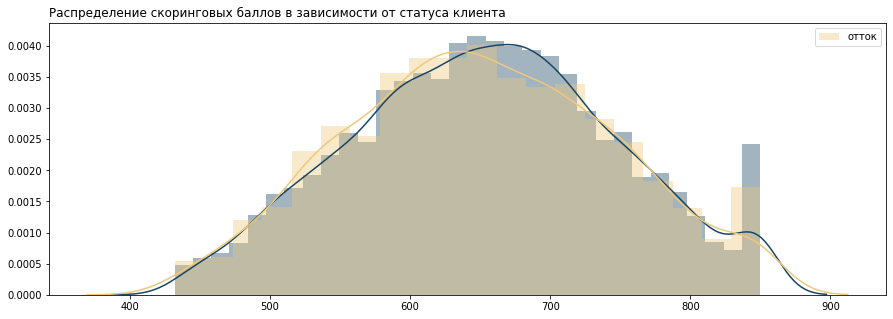

In [234]:
plt.figure(figsize=(15, 5))

sns.distplot(data[data['churn'] == 0]['score'], color = '#184562')
sns.distplot(data[data['churn'] == 1]['score'], color = '#EFC87B', label = 'отток')

plt.title('Распределение скоринговых баллов в зависимости от статуса клиента', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [235]:
alpha = .05  

results = st.stats.ttest_ind(data[data['churn'] == 0]['score'], 
                             data[data['churn'] == 1]['score'],
                             equal_var=False)

print('p-значение: ', results.pvalue)  

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.18689407450668244
Не получилось отвергнуть нулевую гипотезу


Следовательно, баллы кредитного скоринга у клиентов, которые попали в отток, и у действующих клиентов одинаковы.

*ВЫВОД по 4 пункту*

Доход на счете между отточными и лояльными банку клиентами не различаются.

Уровень крединтного скоринга между отточными и лояльными банку клиентами тоже не различается.

## Выводы и рекомендации

# ***Общий вывод***

1. Предобработка данных

Изучены пропуски в данных, наличие дубликатов, изменены названия столбцов на удобные.Пропуски имеются только в столбце с балансом у клиентов из Рыбинска и Ярославля, возможно произошла техническая ошибка.Пропуски оставлены, чтобы не исказить данные. В столбце с заработной платой выявлены и удалены некотрые позиции ниже МРОТ.

При изучении данных были созданы категории клиентов по признакам, что помогло выявить следующее:

- По уровню дохода преобладают клиенты с высокой заработной платой (>100000 рублей)

- По возрасту в датасете преобладают клиенты 25-44 лет (что ожидаемо)

- По скорингу преобладают со средним уровнем кредитного скоринга (450-650 баллов)

- По балансу на счете преобладают клиенты со средним уровнем баланса (100000-150000 рублей)

2. Исследовательский анализ

Среднестатистический клиент банка

- Скоринговый балл 650 (платежеспособный)

- Возраст 39 лет (клиентам от 18 до 92 лет)

- Мужчина или женщина (мужчин и женщин примерно поровну)

- В собственности 5 объектов

- На счету около 120 000р

- Клиент пользуется 1-2 продуктами

- Вероятнее имеет кредитную карту

- Зарплата - около 102 000р

Замечено, что

- Более чем у половны клиентов есть действующий счет в банке

- Средний отток составляет 20%

3. Сегментация

По показателям пола, количества объектов в собственности, активности, наличия кредитной карты исследуемые группы практически не различаются.

Показатель оттока существенно ниже в группе с 2 и более продуктами.

Показатели по количественным группам распределены относительно равномерно.

В разрезе городов очевидным лидером по доле отточных клиентов является Ростов Великий, доля ушедших клиентов в Рыбинске и Ярославле почти равна(в 2 раза ниже).

Заметно превышение доли ушедших среди клиентов, пользующихся 3-4 продуктами банка, нежели среди клиентов, пользующихся 1-2 продуктами.

Выделены сегменты по оттоку:

- Все клиенты, пользующиеся 3 или 4 продуктами банка

- Клиенты из Ростова Великого, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64

- Клиенты из Ростова Великого, мужчины, неактивные пользователи с 1-2 продуктами, возраст 45-64

- Клиенты из Ярославля, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64

- Клиенты из Рыбинска, женщины, неактивные пользователи с 1-2 продуктами, возраст 45-64

- Клиенты из Ростова Великого, женщины, неактивные пользователи с 1-2 продуктами, возраст 65 и старше.

4. Проверка гипотез

Доход на счете между отточными и лояльными банку клиентами не различаются.

Уровень крединтного скоринга между отточными и лояльными банку клиентами тоже не различается.

# ***Рекомендации***

Провести анализ качества обслуживания клиентов банка в Ростове Великом, так как там наибольшее количество сегментов по оттоку. Провести анализ конкурентной среды в этом городе, предложить более актуальные условия для клиентов.

Для удержания клиентов женского возраста следует провести маркетинговые акции с крупными сетевыми магазинами: кэшбэк, начисление пользовательских баллов, розыгрышами призов, скидками.

Бонусы для клиентов с 3-4 продуктами: снижение процентной ставки.

Сформировать выгодные предложения для людей пенсионного возраста ввести льготы на продукты и услуги, так как они склонны к оттоку: снижение процентной ставки, увеличение процента по вкладам.